### A* Algorithm

&nbsp;

Previously we have talked about Dijkstra's algorithm, which is a special case of A\* algorithm, it's time to introduce the generalized form. A\* algorithm is an algorithm to find the shortest path as well. Besides the distance from the beginning to the current vertex, A\* has one more criterion which is called heuristic function. Heuristic function is an estimation of the potential steps from the current vertex to the end. A\* intends to choose the vertex with the least distance from the beginning and potentially the least distance to the end. As two distances are taken into consideration, A\* has higher space complexity than Dijkstra. The tradeoff is its faster execution time than Dijkstra. Given the heuristic function, it is supposed to travel fewer vertices than Dijkstra. Btw, in Dijkstra, the heuristic function equals to zero.

Details of Dijkstra's algorithm could be found in the following link

https://github.com/je-suis-tm/graph-theory/blob/master/dijkstra%20shortest%20path.ipynb

&nbsp;

### Heuristic

&nbsp;

In this case, we choose walking out of a maze as an example. There are three different ways to calculate the heuristic function. 

###### Manhattan Distance

We are gonna use Manhattan distance since we are only allowed to move up, down, left and right in the maze. Think of the maze as street blocks in Manhattan. The only way for a taxi travelling from one point to another is to drive through twists and turns. Let's denote start as (x,y), end as (i,j). The heuristic for Manhattan distance is 

$$
|x-i|+|y-j|
$$

###### Diagonal Distance

In order to use diagonal distance, we must be able to move like a queen on the chessboard with eight different directions. The idea of Avinguda Diagonal may work in Barcelona but apparently not in a maze. The heuristic function of Barcelona distance is 

$$
max(|x-i|,|y-j|)+(\sqrt{2}-1) \times min(|x-i|,|y-j|)
$$

###### Euclidean Distance

Euclidean distance is widely used in geometry. This heuristic function requires us to have the flexibility to move whatever directions we want. Every angle should be valid instead of $90^{\circ}$ in Manhattan distance or $45^{\circ}$ in Barcelona distance. The heuristic function of Euclidean distance is 

$$
\sqrt{(x-i)^2+(y-j)^2}
$$

&nbsp;


In [1]:
import os
os.chdir('K:/ecole/github')
import matplotlib.pyplot as plt

#graph adt
#check the below link for more details
# https://github.com/je-suis-tm/graph-theory/blob/master/graph.py
import graph

In [2]:
#the structure of a* is similar to dijkstra's
#we compute distance from the beginning to the current vertex
#as well as the heuristic function
#for each vertex we iterate, we pick the minimum sum of both
#until we reach the destination
def a_star(ADT,start,end):
    """A* Algorithm,
    a generalized Dijkstra's algorithm with heuristic function to reduce execution time"""
    
    #all weights in dcg must be positive 
    #otherwise we have to use bellman ford instead
    # https://github.com/je-suis-tm/graph-theory/blob/master/bellman_ford%20forex%20arbitrage.ipynb
    neg_check=[j for i in ADT.reveal() for j in ADT.reveal()[i].values()]
    assert min(neg_check)>=0,"negative weights are not allowed, please use Bellman-Ford"
    
    #queue in a* is the same as the queue in dijkstra
    queue={}
    queue[start]=0
    
    #same as dijkstra
    #distance keeps track of distance from starting vertex to any vertex
    distance={} 
    
    #heuristic keeps track of distance from ending vertex to any vertex
    heuristic={}
    
    #route is a dict of the summation of distance and heuristic
    route={}
    
    #criteria
    for i in ADT.vertex():
        
        #same as dijkstra
        distance[i]=float('inf')
        
        #manhattan distance
        heuristic[i]=abs(i[0]-end[0])+abs(i[1]-end[1])
        
    #same as dijkstra
    distance[start]=0

    #pred keeps track of how we get to the current vertex
    pred={}
    
    while queue:
        
        #same as dijkstra
        current=min(queue,key=queue.get)
        queue.pop(current)
        
        #find the minimum summation of both distances
        minimum=float('inf')

        for j in ADT.edge(current):
            
            #check if the current vertex can construct the optimal path
            #from the beginning and to the end
            distance[j]=distance[current]+ADT.weight(current,j)
            route[j]=distance[j]+heuristic[j]
            if route[j]<minimum:
                minimum=route[j]

        for j in ADT.edge(current):
            
            #we only append unvisited and unqueued vertices
            #note that we could have two vertices with the minimum summation
            #that is why we use a loop to find all valid vertices
            if (route[j]==minimum) and (ADT.go(j)==0) and (j not in queue):
                queue[j]=route[j]
                pred[j]=current
        
        #each vertex is visited only once
        ADT.visit(current)
        
        #traversal ends when the target is met
        if current==end:
            break        
    
    #create the shortest path by backtracking
    #trace the predecessor vertex from end to start
    previous=end
    path=[]
    while pred:
        path.insert(0, previous)
        if previous==start:
            break
        previous=pred[previous]
    
    #note that if we cant go from start to end
    #we may get inf for distance[end]
    #additionally, the path may not include start position
    return distance[end],path

In [3]:
#the difficult part of a maze problem is to convert maze into a graph adt
#assume maze is an i*j matrix
#we can convert it into a nested list or a matrix
#then assign coordinates to each vertex, the same as the index
#the top left would be (0,0)
#the bottom right would be (i-1,j-1)
def check_around(matrix,maze,i,j):
    
    #for a vertex with coordinate (i,j)
    #we wanna check its top, bottom, left and right
    #which are (i-1,j),(i+1,j),(i,j-1),(i,j+1)
    #if those vertices mentioned above are not walls
    #'+' denotes wall in the maze, space denotes available path
    #we will append those edges into the graph adt   
    for k,l in [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]:
        try:
            if matrix[k][l]!='+':
                maze.append((i,j),(k,l),1)
        
        #for boundary vertices, we wont find all four vertices near them
        #e.g. only bottom (1,0) and right (0,1) for the top left (0,0)
        #thus, we need to exclude index error
        except IndexError:
            pass
        
    return maze

In [4]:
#before we make comparison of how a* outperforms dijkstra
#we would also love to compare the result with bfs and dfs
#although some minor changes will be applied to the standard bfs and dfs
#bfs_path,dfs_path would give us the path and the length of the path
#unlike the organic bfs or dfs, we stop the iteration when we reach the destination
#details of bfs and dfs can be found in the following link
# https://github.com/je-suis-tm/graph-theory/blob/master/BFS%20DFS%20on%20DCG.ipynb
def bfs_path(ADT,start,end):
    """Breadth First Search to find the path from start to end"""
    
    #create a queue with rule of first-in-first-out
    queue=[]
    queue.append(start)
    
    #pred keeps track of how we get to the current vertex
    pred={}
    
    while queue:
                
        #keep track of the visited vertices
        current=queue.pop(0)
        ADT.visit(current)
                
        for newpos in ADT.edge(current):
            
            #visit each vertex once
            if ADT.go(newpos)==0 and newpos not in queue:
                queue.append(newpos)
                pred[newpos]=current
                
        #traversal ends when the target is met
        if current==end:
            break

    #create the path by backtracking
    #trace the predecessor vertex from end to start
    previous=end
    path=[]
    while pred:
        path.insert(0, previous)
        if previous==start:
            break
        previous=pred[previous]
    
    #note that if we cant go from start to end
    #we may get inf for distance
    #additionally, the path may not include start position
    return len(path)-1,path


#to make our life easier, we use dfs iteration instead of dfs recursion
def dfs_path(ADT,start,end):
    """Depth First Search to find the path from start to end"""
    
    queue=[]
    queue.append(start) 
    
    #pred keeps track of how we get to the current vertex
    pred={}
    
    #the loop is the backtracking part when it reaches cul-de-sac
    while queue:
        
        #keep track of the visited vertices
        current=queue.pop(0)
        ADT.visit(current)
        
        #priority queue
        smallq=[]        
        
        #find children and add to the priority
        for newpos in ADT.edge(current):
            if ADT.go(newpos)==0:
                
                #if the child vertex has already been in queue
                #move it to the frontline of queue
                if newpos in queue:
                    queue.remove(newpos)
                smallq.append(newpos)
                pred[newpos]=current
                
        queue=smallq+queue
        
        #traversal ends when the target is met
        if current==end:
            break
            
    #create the path by backtracking
    #trace the predecessor vertex from end to start
    previous=end
    path=[]
    while pred:
        path.insert(0, previous)
        if previous==start:
            break
        previous=pred[previous]
    
    #note that if we cant go from start to end
    #we may get inf for distance
    #additionally, the path may not include start position
    return len(path)-1,path

In [5]:
#viz
def maze_viz(matrix,start,end,route=None):

    #prepare walls for viz
    #for available paths, we just leave em blank
    walls=[(i,j) for i in range(len(matrix)) for j in range(len(matrix[0])) if matrix[i][j]=='+']
    
    if route:
        
        #create markers for the optimal path
        #direction is derived from the difference
        #between the current state and the previous state
        direction=[]
        for i in range(1,len(route)):
            if route[i][0]-route[i-1][0]>0:
                direction.append('^')
            elif route[i][0]-route[i-1][0]<0:
                direction.append('v')        
            elif route[i][1]-route[i-1][1]>0:
                direction.append('>')
            else:
                direction.append('<')  

        #remove the start
        direction.pop(0)

    #viz
    ax=plt.figure(dpi=100).add_subplot(111)

    #remove boundaries
    for i in ['top','bottom','right','left']:
        ax.spines[i].set_visible(False)

    #walls
    plt.scatter([i[1] for i in walls],[i[0] for i in walls],
                marker='X',s=100,color='black')

    #starting point
    plt.scatter(start[1],start[0],marker='*',
                s=100,color='gold')
    
    #walk out of the maze
    if route:
        
        #remove start and end from route
        for i in range(len(route)-2):
            plt.scatter(route[i+1][1],route[i+1][0],
                        marker=direction[i],color='silver')

    #ending point
    plt.text(end[1],end[0],'EXIT',color='red',
         horizontalalignment='center',
         verticalalignment='center')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [6]:
#read the maze file
#it can be downloaded from the data subfolder
# https://github.com/je-suis-tm/graph-theory/blob/master/data/maze.txt
f=open('maze.txt','r')
text=f.read()
matrix=[list(i) for i in text.splitlines()]

In [7]:
#create graph adt
maze=graph.graph()

for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        
        #for vertices in the maze
        #'S' is the starting point
        #when we find it, we set the start variable
        #and dont forget to append start into graph adt
        if matrix[i][j]=='S':
            start=(i,j)
            maze=check_around(matrix,maze,i,j)
            
        #when we find ' ', we use check_around function to add edges
        elif matrix[i][j]==' ':
            maze=check_around(matrix,maze,i,j)
            
            #if there is a breach on the boundary wall
            #we consider it as exit
            #we assume there is only one exit in this maze
            #we can also change the destination to somewhere inside the maze
            #in that case we have to consider the situation 
            #what if we cannot get to the destination
            if (i==0) or (i==len(matrix)-1) or (j==0) or (j==len(matrix[0])-1):
                end=(i,j)
                
        #when we find '+', we skip the brick wall
        else:
            pass

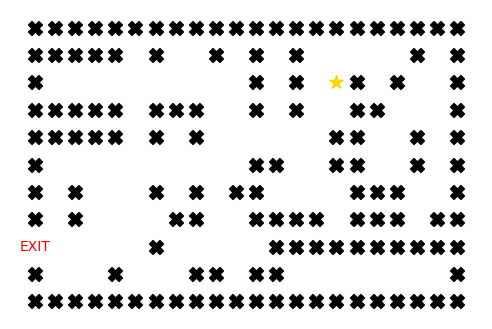

In [8]:
#gods view
maze_viz(matrix,start,end)

In [9]:
#a* iterates through the least vertices
#it slightly faster than dijkstra for that reason
len_of_path_astar,path_astar=a_star(maze,start,end)
num_of_v_astar=len([maze.route()[i] for i in maze.route() if maze.route()[i]==1])
maze.clear(whole=True)

print(f'length of the path:',len_of_path_astar)
print(f'number of vertices A* has travelled:',num_of_v_astar)

length of the path: 21
number of vertices A* has travelled: 45


In [10]:
%%timeit
_,_=graph.a_star(maze,start,end)
maze.clear(whole=True)

480 µs ± 2.64 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
len_of_path_dijkstra,path_dijkstra=graph.dijkstra(maze,start,end)
num_of_v_dijkstra=len([maze.route()[i] for i in maze.route() if maze.route()[i]==1])
maze.clear(whole=True)

print(f'length of the path:',len_of_path_dijkstra)
print(f'number of vertices Dijkstra has travelled:',num_of_v_dijkstra)

length of the path: 21
number of vertices Dijkstra has travelled: 86


In [12]:
%%timeit
_,_=graph.dijkstra(maze,start,end)
maze.clear(whole=True)

551 µs ± 3.44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
#bfs is guaranteed to find the optimal path
#it is funny that bfs is faster than both a* and dijkstra
len_of_path_bfs,path_bfs=bfs_path(maze,start,end)
num_of_v_bfs=len([maze.route()[i] for i in maze.route() if maze.route()[i]==1])
maze.clear(whole=True)

print(f'length of the path:',len_of_path_bfs)
print(f'number of vertices BFS has travelled:',num_of_v_bfs)

length of the path: 21
number of vertices BFS has travelled: 86


In [14]:
%%timeit
_,_=graph.bfs_path(maze,start,end)
maze.clear(whole=True)

216 µs ± 2.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
#dfs may find the path, it may not be the optimal
#it is funny that dfs is faster than both a* and dijkstra
len_of_path_dfs,path_dfs=dfs_path(maze,start,end)
num_of_v_dfs=len([maze.route()[i] for i in maze.route() if maze.route()[i]==1])
maze.clear(whole=True)

print(f'length of the path:',len_of_path_dfs)
print(f'number of vertices DFS has travelled:',num_of_v_dfs)

length of the path: 35
number of vertices DFS has travelled: 66


In [16]:
%%timeit
_,_=graph.dfs_path(maze,start,end)
maze.clear(whole=True)

213 µs ± 2.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


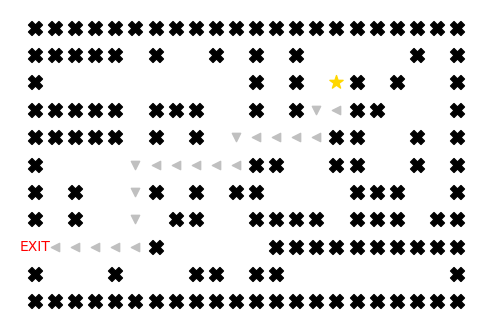

In [17]:
#mazerunner yay!
maze_viz(matrix,start,end,path_astar)